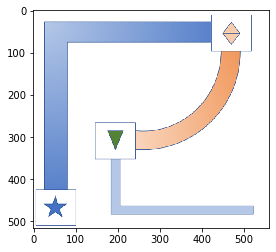

In [1]:
import cv2
import numpy as np
import math
import imutils
from matplotlib import pyplot as plt
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
def cartesian_distance(x, y): return math.sqrt(x**2+y**2)

frame = cv2.imread("Picture1.png")
# frame = imutils.resize(frame, height=1000)
imshow(frame)

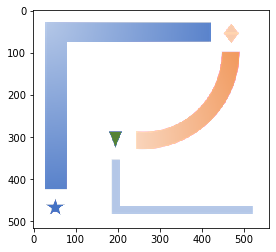

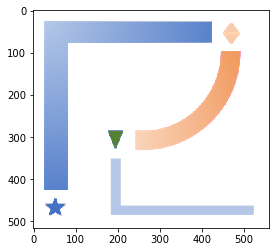

In [2]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
LUV = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(frame,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)
imshow(dilation)
imshow(erosion)

Found 6contours.


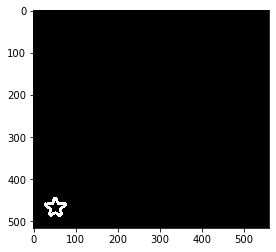

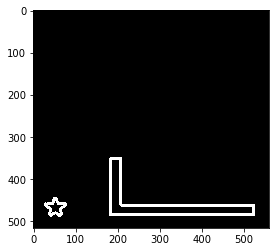

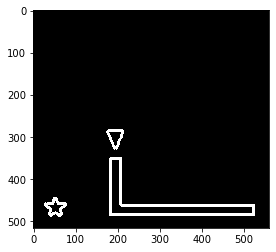

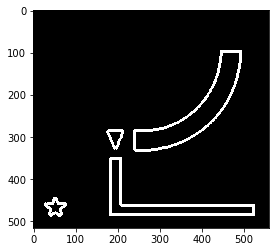

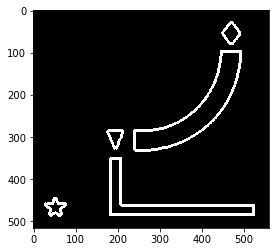

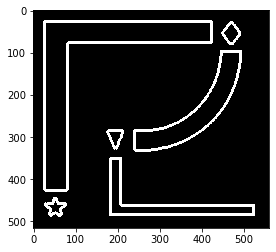

In [3]:
edges = cv2.Canny(erosion, 20, 100)
contours, hierarchy = cv2.findContours(edges,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
black = np.zeros(frame.shape[:2], dtype="uint8") # For visualize card border
print("Found " + str(len(contours)) + "contours.")
for i in range(len(contours)): # Draw each contours
    cv2.drawContours(black, contours, i, 255, 6)
    imshow(black)

In [4]:
### Filter Out Noise Contours Here ###
# rect = cv2.boundingRect(c)
# if rect[2] < 100 or rect[3] < 100: continue # Size checking

In [15]:
class Object:
    _isPath = None
    def __init__(self, contours):
        self.contours = contours
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        self.rect = np.asarray(approx, dtype = "float32")
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        self.center = (cX, cY)
    def image_part(self, source):
        rect = cv2.boundingRect(self.contours)
        x, y, w, h = rect
        return source[y:y+h, x:x+w]
    def image(self, source):
        rect = cv2.boundingRect(self.contours)
        x, y, w, h = rect
        mask = np.zeros(source.shape[:2], dtype="uint8")
        cv2.drawContours(mask, self.contours, -1, 255, 3)
        mask = cv2.fillPoly(mask, self.contours, 255)
        masked = cv2.bitwise_or(source, source, mask=mask)
#         return masked[y:y+h, x:x+w]
        return mask

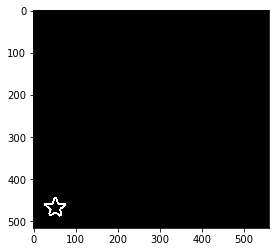

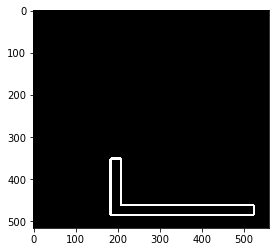

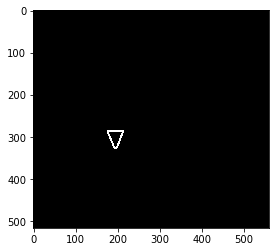

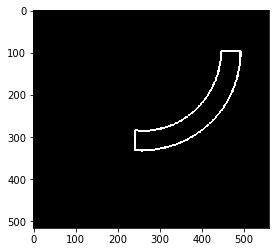

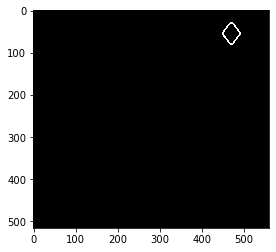

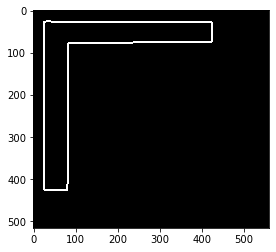

In [16]:
objects = []
for c in contours: objects.append(Object(c))
for o in objects: imshow(o.image(frame))

In [ ]:
## Recognize first marker ##
def first_marker(markers, source):
    (h, w) = source.shape[:2]
    centers = [marker.center for marker in markers]
    ## Find distance from corner
    distances = []
    for center in centers:
        dis_x = min(center[0], w-center[0])
        dis_y = min(center[1], h-center[1])
        distances.append(cartesian_distance(dis_x, dis_y))
    index_start = np.argmin(distances) # return index of minimum distance
    return markers[index_start]
first_marker()